In [1]:
import os
import glob

from skimage.io import imread
from skimage.transform import resize
import numpy as np

from tensorflow.keras.utils import normalize
from sklearn.model_selection import train_test_split

In [2]:
# gethering image paths across folders and related data information from filename
# each element contain patiend_id, idx5, patch X coord, patch Y coord, class of patch ( 0 - non-IDK, 1 - IDK )

def list_of_data_images(img_folder='IDC_regular_ps50_idx5'):
    
    path = os.path.join(os.pardir, os.pardir, img_folder,'*','*','*')
    paths = glob.glob(path)

    str_preproc=[]
    for img_path in paths:
        img_name = os.path.basename(img_path)
        img_name = img_name.split('_')

        for i in range(2,len(img_name)):
            img_name[i] = int(''.join(filter(str.isdigit, img_name[i])))
        img_name.append(os.path.abspath(img_path))
        str_preproc.append(img_name)

    print(f"Number of data elements in list: {len(str_preproc)}")
    return str_preproc

In [7]:
list_data_img = list_of_data_images()
print(list_data_img[:10])

Number of data elements in list: 277524
[['10253', 'idx5', 1001, 1001, 0, 'c:\\Users\\sds70\\Desktop\\DSI\\project_2\\IDC_regular_ps50_idx5\\10253\\0\\10253_idx5_x1001_y1001_class0.png'], ['10253', 'idx5', 1001, 1051, 0, 'c:\\Users\\sds70\\Desktop\\DSI\\project_2\\IDC_regular_ps50_idx5\\10253\\0\\10253_idx5_x1001_y1051_class0.png'], ['10253', 'idx5', 1001, 1101, 0, 'c:\\Users\\sds70\\Desktop\\DSI\\project_2\\IDC_regular_ps50_idx5\\10253\\0\\10253_idx5_x1001_y1101_class0.png'], ['10253', 'idx5', 1001, 1151, 0, 'c:\\Users\\sds70\\Desktop\\DSI\\project_2\\IDC_regular_ps50_idx5\\10253\\0\\10253_idx5_x1001_y1151_class0.png'], ['10253', 'idx5', 1001, 1201, 0, 'c:\\Users\\sds70\\Desktop\\DSI\\project_2\\IDC_regular_ps50_idx5\\10253\\0\\10253_idx5_x1001_y1201_class0.png'], ['10253', 'idx5', 1001, 1251, 0, 'c:\\Users\\sds70\\Desktop\\DSI\\project_2\\IDC_regular_ps50_idx5\\10253\\0\\10253_idx5_x1001_y1251_class0.png'], ['10253', 'idx5', 1001, 1301, 0, 'c:\\Users\\sds70\\Desktop\\DSI\\project_2\\

In [8]:
# convert images to 3 dim  numpy array

img_size = ( 50, 50 )
images_dataset = []
for img in list_data_img:    
    image = np.asarray(imread(img[len(img)-1] ), dtype='uint8')
    if image.shape != (50, 50, 3):
        image = resize( image, img_size, mode='reflect', preserve_range=True ) # resize images to given size and dimmensions
    images_dataset.append( image )

images_dataset = np.asarray( images_dataset, dtype='float32' )                     # convert to NumPy array
images_dataset = normalize( images_dataset )
print(f"\n shape: {images_dataset.shape}")

KeyboardInterrupt: 

### Optinal step. 
### Save and load data to pkl file.

In [2]:
import pickle

# Save the array to a pickle file
# images_dataset - NumPy dataset
# parts - split to save in separated files. More parts less memory need 
def SaveNpToPkl( filename, images_dataset, parts = 1 ):
    start_ind = 0
    step = images_dataset.shape[0] * parts//100
    for i in range(0, parts):
        filename_pkl = filename + str(i) +'.pkl'
        start_ind = step*i
        if i != parts-1:
            end_ind = step*(i+1) 
        else:
            end_ind = images_dataset.shape[0] 
    
        print( f" Dataset with indexes {start_ind}, {end_ind} saved to file {filename_pkl}" )
        with open(filename_pkl, 'wb') as f:
            pickle.dump(images_dataset[start_ind : end_ind], f)

# Load the array from the pickle file
# parts - parts to load
def LoadPklToNp( filename, parts=1 ):
    total_list = []
    paths = glob.glob(filename)
    for path in paths[:parts]:
        print(f"Loading file {path}")
        with open(path, 'rb') as f:
            part_array = pickle.load(f)
        total_list += list(part_array)
        #total_list = np.concatenate(( total_array, array), axis=0 )
    return total_list


In [3]:
# call numpy to pkl save func.

# Specify relative path and the filename
parts = 10
filename = os.path.join( os.pardir, 'data', 'processed', 'img_dataset')
SaveNpToPkl( filename, images_dataset, parts )

filename = os.path.join( os.pardir, 'data', 'processed', 'lables_data')
#SaveNpToPkl( filename, np.asarray(list_data_img), parts )

NameError: name 'images_dataset' is not defined

In [49]:
# call pkl loader
parts_load = 8 # max no. of files can be loaded on my laptop 
Load_path = os.path.join( os.pardir, 'data', 'processed', 'img_dataset*' )
images_dataset = np.asarray ( LoadPklToNp( Load_path, parts_load ), dtype='float32')
Load_path = os.path.join( os.pardir, 'data', 'processed', 'lables_data*' )
labels_dataset = np.asarray(np.asarray (LoadPklToNp( Load_path, parts_load ) )[:, 4:5], dtype='i1' )                   # [:, 4:5] - retrive only label values

Loading file ..\data\processed\img_dataset0.pkl
Loading file ..\data\processed\img_dataset1.pkl
Loading file ..\data\processed\img_dataset2.pkl
Loading file ..\data\processed\img_dataset3.pkl
Loading file ..\data\processed\img_dataset4.pkl
Loading file ..\data\processed\img_dataset5.pkl
Loading file ..\data\processed\img_dataset6.pkl
Loading file ..\data\processed\img_dataset7.pkl
Loading file ..\data\processed\lables_data0.pkl
Loading file ..\data\processed\lables_data1.pkl
Loading file ..\data\processed\lables_data2.pkl
Loading file ..\data\processed\lables_data3.pkl
Loading file ..\data\processed\lables_data4.pkl
Loading file ..\data\processed\lables_data5.pkl
Loading file ..\data\processed\lables_data6.pkl
Loading file ..\data\processed\lables_data7.pkl


In [50]:
x_train, x_test, y_train, y_test = train_test_split( images_dataset, labels_dataset, test_size=0.15, stratify=labels_dataset, random_state=42)

In [6]:
type(labels_dataset), len(labels_dataset), labels_dataset[0]

(list, 277524, '0')

In [42]:
# Check the shapes
print(f'Images dataset shape: {images_dataset.shape}')
print(f'Labels dataset shape: {labels_dataset.shape}')

Images dataset shape: (111008, 50, 50, 3)
Labels dataset shape: (111008, 1)


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


model = Sequential([
    # convolutional Layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)),
    MaxPooling2D((2, 2)),

    # 2nd convolutional Layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten 
    Flatten(),

    # fully connected layer
    Dense(128, activation='relu'),
    Dropout(0.5),  # increased dropout rate to 0.7 for overfitting reduction 


    # output
    Dense(1, activation='sigmoid')  
])


model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


model.summary()



Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 7744)              0         
                                                                 
 dense_20 (Dense)            (None, 128)              

In [52]:
# Train the model
#history = model.fit(x_train, y_train, 
                    #epochs=10, 
                    #batch_size=32, 
                    #validation_data=(x_test, y_test))


Epoch 1/10
5898/5898 [==============================] - 184s 31ms/step - loss: 0.4397 - accuracy: 0.8111 - val_loss: 0.3773 - val_accuracy: 0.8373
Epoch 2/10
5898/5898 [==============================] - 151s 26ms/step - loss: 0.4045 - accuracy: 0.8252 - val_loss: 0.4383 - val_accuracy: 0.8233
Epoch 3/10
5898/5898 [==============================] - 145s 25ms/step - loss: 0.3924 - accuracy: 0.8310 - val_loss: 0.3570 - val_accuracy: 0.8496
Epoch 4/10
5898/5898 [==============================] - 149s 25ms/step - loss: 0.3856 - accuracy: 0.8346 - val_loss: 0.3567 - val_accuracy: 0.8459
Epoch 5/10
5898/5898 [==============================] - 155s 26ms/step - loss: 0.3817 - accuracy: 0.8370 - val_loss: 0.4729 - val_accuracy: 0.7596
Epoch 6/10
 280/5898 [>.............................] - ETA: 2:30 - loss: 0.3748 - accuracy: 0.8392

KeyboardInterrupt: 

In [56]:
# training after updating the hyperparameters
history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(x_test, y_test))

Epoch 1/10
5898/5898 [==============================] - 354s 60ms/step - loss: 0.4282 - accuracy: 0.8124 - val_loss: 0.3757 - val_accuracy: 0.8391
Epoch 2/10
5898/5898 [==============================] - 342s 58ms/step - loss: 0.3871 - accuracy: 0.8329 - val_loss: 0.3641 - val_accuracy: 0.8404
Epoch 3/10
5898/5898 [==============================] - 288s 49ms/step - loss: 0.3683 - accuracy: 0.8430 - val_loss: 0.3389 - val_accuracy: 0.8557
Epoch 4/10
5898/5898 [==============================] - 288s 49ms/step - loss: 0.3588 - accuracy: 0.8474 - val_loss: 0.3332 - val_accuracy: 0.8582
Epoch 5/10
5898/5898 [==============================] - 289s 49ms/step - loss: 0.3492 - accuracy: 0.8530 - val_loss: 0.3424 - val_accuracy: 0.8544
Epoch 6/10
5898/5898 [==============================] - 304s 52ms/step - loss: 0.3433 - accuracy: 0.8557 - val_loss: 0.3446 - val_accuracy: 0.8474
Epoch 7/10
5898/5898 [==============================] - 283s 48ms/step - loss: 0.3406 - accuracy: 0.8568 - val_loss: 0

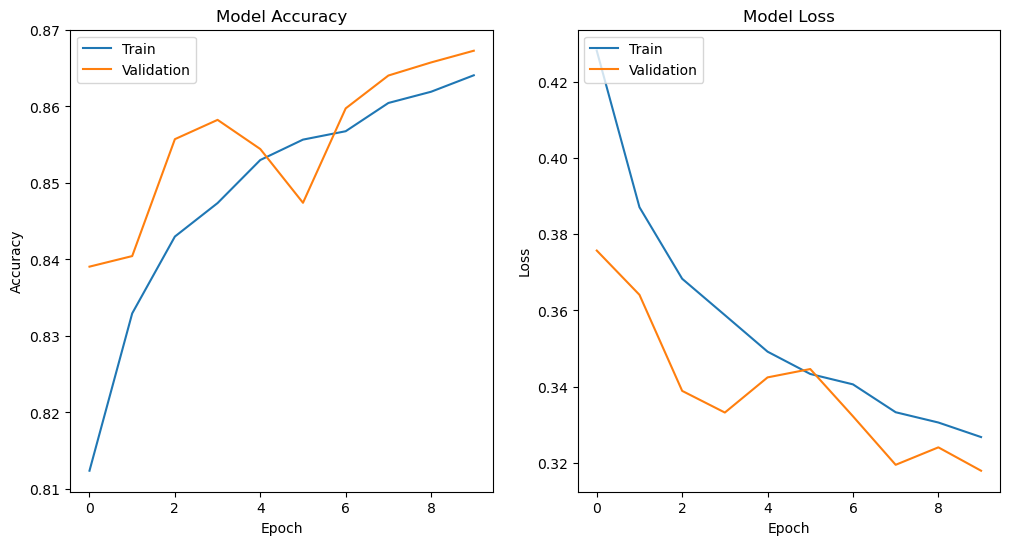

In [57]:
import matplotlib.pyplot as plt


history = model.history

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
